In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from numpy import random
from dataclasses import dataclass

PINK = (179, 102, 255)

class face:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.w = 0
        self.h = 0
        self.dx = 0 
        self.dy = 0
        self.confidence = 0
        self.weight = 0
        self.rHist = 0
        self.gHist = 0
        self.bHist = 0
    def get_rect(self):
        return(self.x, self.y, self.w, self.h)
    def set_rect(self, x, y, w, h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h
        
def getSamples(im, f, predX, predY, predW, predH, numSamples, searchSTD, wLimit, hLimit):
    samples = []
    
    #generate random samples
    for randGenIter in range(numSamples):
        #generate two random uniformly dist numbers
        n1 = random.normal(0,1)
        n2 = random.normal(0,1)
        n3 = random.normal(0,1)
        
        #make std dev 1/3 of face dim and mean at the predicted position
        n1 *= f.w * searchSTD
        n1 += predX
        n2 *= f.h * searchSTD
        n2 += predY
        
        n3 = 1
        
        scale = n3
        newWidth = predW * scale
        newHeight = predH * scale
        
        if (n1 > 0) and (n1 < wLimit - newWidth) and (n2 < hLimit - newHeight):#if random position is on the image
            #declare a face at the location
            newFace = face()
            #newRect = rect()
#             newFace.rect = rect(n1, n2, newWidth, newHeight)
            newFace.x = int(n1)
            newFace.y = int(n2)
            newFace.w = int(newWidth)
            newFace.h = int(newHeight)
#             global imR 
#             global imG 
#             global imB
##Maybe here?
            #ROI = im[newFace.:x+w, y:y+h] 
            newFace.rHist = getHist(imR, newFace.x, newFace.y, newFace.w, newFace.h)
            newFace
            newFace.rHist = getHist()
            newFace.gHist = getHist(imG, newFace.x, newFace.y, newFace.w, newFace.h)
#             newFace.gHist = getHist(imG, newFace.y, newFace.w, newFace.h)
            newFace.bHist = getHist(imB, newFace.x, newFace.y, newFace.w, newFace.h)
#             newFace.bHist = getHist(imB, newFace.y, newFace.w, newFace.h)
    
            newFace.dx = 0
            newFace.dy = 0
            
            #calc liklihood/weight
            rCorr = cv.compareHist(newFace.rHist, f.rHist, cv.HISTCMP_CORREL)
            gCorr = cv.compareHist(newFace.gHist, f.gHist, cv.HISTCMP_CORREL)
            bCorr = cv.compareHist(newFace.bHist, f.bHist, cv.HISTCMP_CORREL)
            
            likelihood = (rCorr*0.4 + gCorr*0.3 + bCorr*0.3)
            newFace.weight = exp(-16.0 * (1-likelihood))
            samples.append(newFace)
    return samples

def CreateImage(width, height, rgb_color=(0, 0, 0)):
    image = np.zeros((height, width, len(rgb_color)), np.uint8)

    # Since OpenCV uses BGR, convert the color first
    color = tuple(reversed(rgb_color))
    # Fill image with color
    image[:] = color
    return image

def getHist(im, x, y, w, h):
#     cv.SetImageROI(im, (x,y,w,h))
#     try:
#         ROI = im[x:x+w, y:y+h]
#     except:
#         print('\nx:{}'.format(x) + '\ny:{}'.format(y) + '\nw:{}'.format(w) + '\nh:{}'.format(h))
#         quit()
    ROI = im[x:x+w, y:y+h]    
    numBins = 64
    rangez = [0.0, 255.0]
    ####
#     gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
#     if im == None:
#         print('no image')
    h = cv.calcHist([ROI], [0], mask = None, histSize = [64], ranges = rangez)
#     h = cv.calcHist(im, 1, numBins, CV_HIST_ARRAY,ranges = range)

    ####
#     cv.ResetImageROI(im)
    return h

In [129]:
face_detect = cv.CascadeClassifier("haarcascade_frontalface_default.xml")

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
# ret, frame = cap.read()
face_data = []

while len(face_data) == 0:
    ret,frame = cap.read()
    if not ret:
        print("Can't recieve frame (stream end?). Exiting...")
        break
    face_data = face_detect.detectMultiScale(frame, 1.3, 5)
    cv.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break
        

# while True:
#     # Capture frame-by-frame
#     ret, frame = cap.read()
#     # if frame is read correctly ret is True
#     if not ret:
#         print("Can't receive frame (stream end?). Exiting ...")
#         break
#      # Our operations on the frame come here
#     face_data = face_detect.detectMultiScale(frame, 1.3, 5)
    
#     for (x, y, w, h) in face_data:
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
#         roi = frame[y:y+h, x:x+w]
#         # applying a gaussian blur over this new rectangle area
#         roi = cv2.GaussianBlur(roi, (23, 23), 30)
#         # impose this blurred image on original image to get final image
#         frame[y:y+roi.shape[0], x:x+roi.shape[1]] = roi
    
# #     gray = cv2.cvtColor(frame, cv.COLOR_BGR2GRAY)
#      # Display the resulting frame
# #     cv2.imshow('frame', gray)
#     cv2.imshow('frame', frame)
#     if cv2.waitKey(1) == ord('q'):
#         break
        
cap.release()
cv.destroyAllWindows()

Text(0.5, 1.0, 'Face Detection')

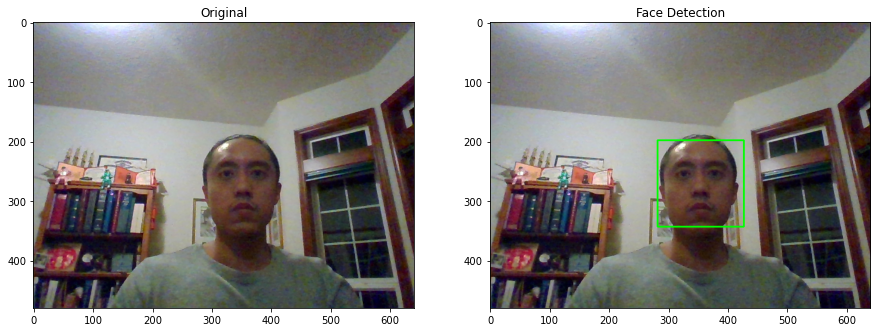

In [153]:
figure = plt.figure(figsize = (15,7))
figure.clf()
axes = figure.add_subplot(121)
axes.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
axes.set_title('Original')

axes = figure.add_subplot(122)
frame_rect = frame.copy()
for(x, y, w, h) in face_data:
    frame_rect = cv.rectangle(frame_rect, (x,y), (x + w, y + h), (0, 255, 0), 2)
    roi = frame[y:y+h, x:x+w]
    
axes.imshow(cv.cvtColor(frame_rect, cv.COLOR_BGR2RGB))
axes.set_title('Face Detection')

In [154]:
def drawSamples(im, f, numSamples, searchSTD):
    samples = []
    for randGenIter in range(numSamples):
        n1 = random.normal(0,1)
        n2 = random.normal(0,1)
        #n3 = random.normal(0,1)
        
        #make std dev 1/3 of face dim and mean at the predicted position
        n1 *= f.w * searchSTD
        n1 += f.x
        n2 *= f.h * searchSTD
        n2 += f.y
        
        newFace = face()
        
        newFace.x = int(n1)
        newFace.y = int(n2)
        newFace.w = f.w
        newFace.h = f.h
        
        ROI = im[newFace.x:newFace.x + newFace.w, newFace.y:newFace.y + newFace.h]
        newFace.bHist = cv.calcHist([ROI], [0], mask = None, histSize = [64], ranges = [0.0, 255.0])
        newFace.gHist = cv.calcHist([ROI], [1], mask = None, histSize = [64], ranges = [0.0, 255.0])
        newFace.rHist = cv.calcHist([ROI], [2], mask = None, histSize = [64], ranges = [0.0, 255.0])
        
        newFace.dx = 0
        newFace.dy = 0
        
        rCorr = cv.compareHist(newFace.rHist, f.rHist, cv.HISTCMP_CORREL)
        gCorr = cv.compareHist(newFace.gHist, f.gHist, cv.HISTCMP_CORREL)
        bCorr = cv.compareHist(newFace.bHist, f.bHist, cv.HISTCMP_CORREL)
        
        likelihood = (rCorr*0.4 + gCorr*0.3 + bCorr*0.3)
        newFace.weight = np.exp(-16.0 * (1-likelihood))
        samples.append(newFace)
    return samples



In [132]:
face0 = face()
face0.set_rect(x, y, w, h)
face0.confidence = 2
face0.dx = 0
face0.dy = 0
face0.bHist = cv.calcHist([roi], [0], mask = None, histSize = [64], ranges = [0.0, 255.0])
face0.gHist = cv.calcHist([roi], [1], mask = None, histSize = [64], ranges = [0.0, 255.0])
face0.rHist = cv.calcHist([roi], [2], mask = None, histSize = [64], ranges = [0.0, 255.0])
samples = drawSamples(frame, face0, 100, 0.2)


Text(0.5, 1.0, 'Drawing 100 Samples')

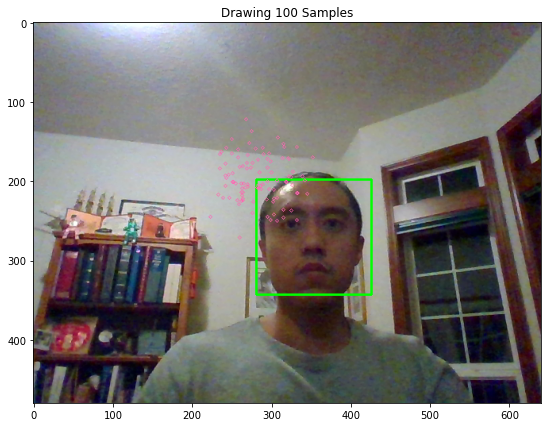

In [183]:
particle_image = frame_rect.copy()
for samp in samples:
    particle_image = cv.circle(particle_image, (samp.x, samp.y), 2, (PINK), 1)
plt.figure(figsize = (10,7))
plt.imshow(cv.cvtColor(particle_image, cv.COLOR_BGR2RGB))
plt.title('Drawing 100 Samples')

In [197]:
cap = cv.VideoCapture(0)
face_data2 = []
particle2 = 0
while True:
    ret, frame2 = cap.read()
    face_data2 = face_detect.detectMultiScale(frame2, 1.3, 5)
    particles2 = frame2.copy() 
    for samp in samples:
        particles2 = cv.circle(particles2, (samp.x, samp.y), 2, (PINK), 1)
#     frame_rect2 = frame2.copy()    
#     for(x, y, w, h) in face_data2:
#         frame_rect2 = cv.rectangle(frame_rect, (x,y), (x + w, y + h), (0, 255, 0), 2)

    cv.imshow('frame2', particles2)
#     cv.imshow('frame2', frame_rect2)
    if (cv2.waitKey(100) == ord('q')) and (len(face_data2) != 0):
        break
cap.release()
cv.destroyAllWindows()
roi2 = frame2[y:y+h, x:x+w]

Text(0.5, 1.0, 'Particle Sampling')

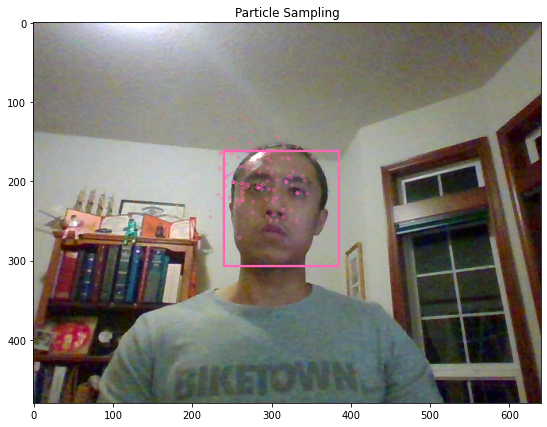

In [209]:
frame_rect2 = particles2.copy()    
for(x, y, w, h) in face_data2:
    frame_rect2 = cv.rectangle(frame_rect2, (x,y), (x + face0.w, y + face0.h), PINK, 2)
    
# plt.figure(10)
plt.figure(figsize = (10,7))
plt.imshow(cv.cvtColor(frame_rect2, cv.COLOR_BGR2RGB))
plt.title('Particle Sampling')

Text(0.5, 1.0, 'Estimated State Update')

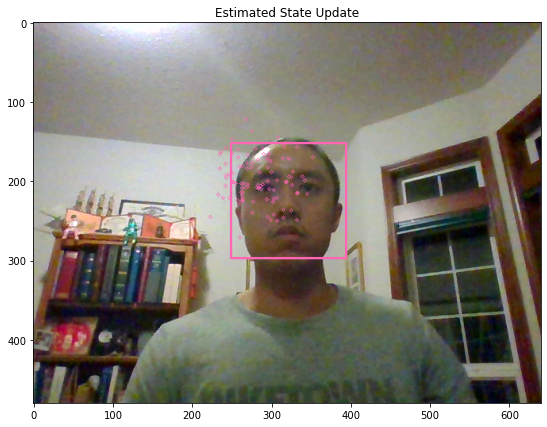

In [187]:
plt.figure(figsize = (10,7))
plt.imshow(cv.cvtColor(frame_rect2, cv.COLOR_BGR2RGB))
plt.title('Estimated State Update')

In [222]:
face1 = face()
face1.set_rect(x, y, w, h)
face1.confidence = 2
face1.dx = 0
face1.dy = 0
face1.bHist = cv.calcHist([roi2], [0], mask = None, histSize = [64], ranges = [0.0, 255.0])
face1.gHist = cv.calcHist([roi2], [1], mask = None, histSize = [64], ranges = [0.0, 255.0])
face1.rHist = cv.calcHist([roi2], [2], mask = None, histSize = [64], ranges = [0.0, 255.0])
samples2 = drawSamples(frame, face1, 100, 0.2)


Text(0.5, 1.0, 'Particle States Updated, then Resample Particles')

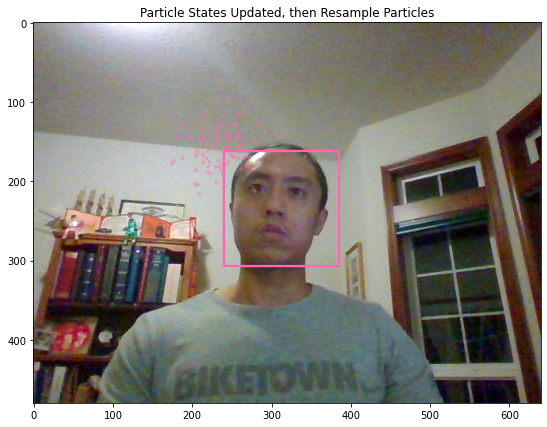

In [214]:
particle_image2 = frame2.copy()
for samp in samples2:
    particle_image2 = cv.circle(particle_image2, (samp.x, samp.y), 2, (PINK), 1)
for(x, y, w, h) in face_data2:
    particle_image2 = cv.rectangle(particle_image2, (x,y), (x + face0.w, y + face0.h), PINK, 2)
plt.figure(figsize = (10,7))
plt.imshow(cv.cvtColor(particle_image2, cv.COLOR_BGR2RGB))
plt.title('Particle States Updated, then Resample Particles')

Text(0.5, 1.0, 'Blue Channel Histogram of New Estimated Face Rectangle \n(Estimated State)')

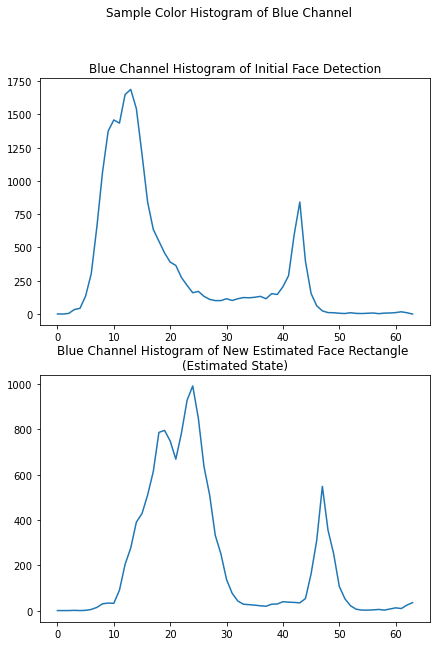

In [232]:
fig, axes = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(7)
fig.suptitle('Sample Color Histogram of Blue Channel')
axes[0].plot(face0.bHist)
axes[0].set_title('Blue Channel Histogram of Initial Face Detection')

axes[1].plot(face1.bHist)
axes[1].set_title('Blue Channel Histogram of New Estimated Face Rectangle \n(Estimated State)')

In [205]:
face_data

array([[281, 198, 145, 145]], dtype=int32)